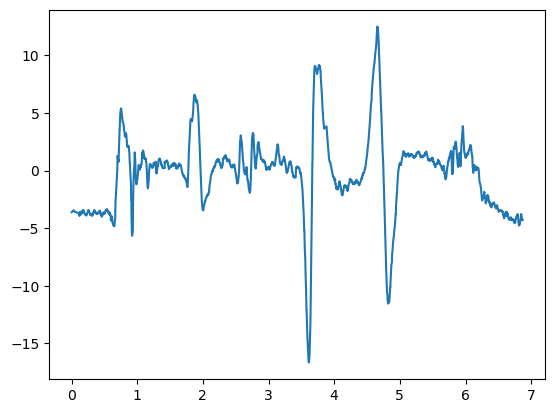

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os 
csv_filename = 'sample_sensor_data.csv'
data  = np.genfromtxt(csv_filename, delimiter = ",").T
timestamps = (data[0] - data[0,0]) /1000

accel_data = data[1:4]
gyro_data = data[4: -1]
plt.plot(timestamps,accel_data[0])
plt.show()

In [3]:
def peak_detection(t, sig):
    peaks = []
    max_val = - np.Inf
    for i in range(len(sig)):
        if sig[i] > max_val:
            max_val = sig[i]
            position = t[i]
    peaks.append((position, max_val))
    return np.array(peaks)


# def better_peak_detection(t, sig,thresh = -np.Inf):
#     peaks = []
#     for i in range(0, len(sig)):
#         # if sig[i-1] <sig[i] and  sig[i+1] < sig[i] :
#         #     print('test')
#         if sig[i] > thresh:
#             if sig[i-1] < sig[i] and  sig[i+1] < sig[i] :
#                 peaks.append((t[i], sig[i]))
#     return np.array(peaks)

def better_peak_detection(t, sig,thresh):
    peaks = []
    for i in range(0, len(sig)):
        if sig[i] > thresh:
            if sig[i-2] < sig[i] and  sig[i+2] < sig[i] :
                peaks.append((t[i], sig[i]))
    return np.array(peaks)



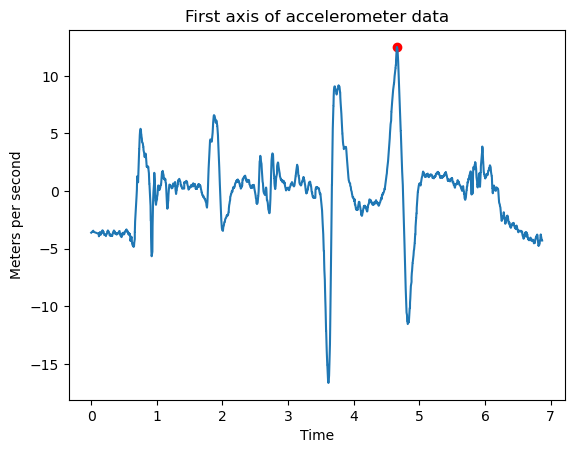

In [4]:
max_peaks = peak_detection(timestamps, accel_data[0])
plt.scatter(max_peaks[:,0], max_peaks[:,1], color = 'red')
plt.plot(timestamps,accel_data[0])
plt.title("First axis of accelerometer data")
plt.xlabel("Time")
plt.ylabel("Meters per second")
plt.show()

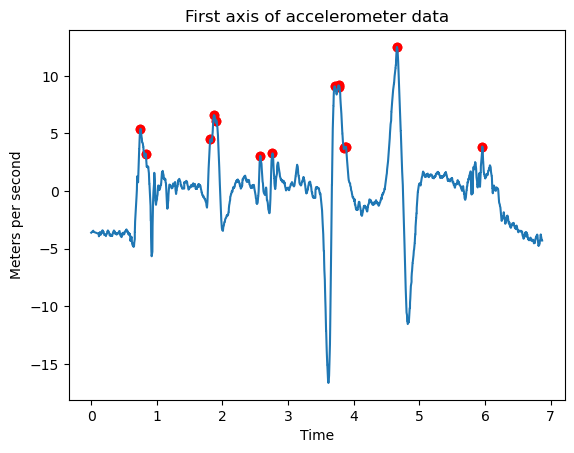

In [5]:
max_peaks = better_peak_detection(timestamps, accel_data[0], 3)
plt.scatter(max_peaks[:,0], max_peaks[:,1], color = 'red')
plt.plot(timestamps,accel_data[0])
plt.title("First axis of accelerometer data")
plt.xlabel("Time")
plt.ylabel("Meters per second")
plt.show()
